# Lab 2: Working with Data

- **Author:** Prof. Mu-Jeung Yang
- **Version:** June 2018
- **Course:** OAMO 3040: Business Econometrics II

## Before you start: please rename the file to QAMO 3040 Lab 2, LASTNAME, FIRSTNAME.ipynb, with your LASTNAME and FIRSTNAME in place of the stand-in phrases, to prepare the file for submission later.

### Learning Objectives:
By the end of the lab, you will be able to:
* read files into Python
* work with Series and Data Frames using the Pandas library
* produce basic graphs using the Matplotlib library

### To do before lab:
* Watch 10-minute tour of pandas: https://vimeo.com/59324550

### References: 
 * [Pandas](http://pandas.pydata.org/pandas-docs/stable/)
 * [Matplotlib Gallery](http://matplotlib.org/gallery.html)


### 1. Pandas: A library to load and prepare data

More references: 

http://www.scipy-lectures.org/packages/statistics/index.html

http://localhost:8888/notebooks/gitRepo/csc432-notebooks/week02-02-pandas_tutorial.ipynb

http://localhost:8888/notebooks/gitRepo/python-seminar-2015/pandas/01-pandas.ipynb


#### Import modules

In [1]:
import numpy as np
import pandas as pd

### 1.1 Using Pandas: dry run

#### Create a Series

In [2]:
a_series = pd.Series([1,2,3,4])

In [3]:
a_series

0    1
1    2
2    3
3    4
dtype: int64

In [4]:
np.random.seed(1234)
b_series = pd.Series(np.random.randint(0,21,10))

In [5]:
b_series

0    15
1    19
2     6
3    12
4    20
5    15
6    17
7     9
8    11
9    12
dtype: int32

#### Create a DataFrame

In [6]:
df = pd.DataFrame({'a': a_series, 'b': b_series})

In [7]:
df

,a,b
0,1.0,15
1,2.0,19
2,3.0,6
3,4.0,12
4,NaN,20
5,NaN,15
6,NaN,17
7,NaN,9
8,NaN,11
9,NaN,12


#### Summary statistics of a Series

In [8]:
b_series.mean()

13.6

In [9]:
df['b'].mean()

13.6

In [10]:
df.b.mean()

13.6

In [11]:
df.a.mean()

2.5

#### Minimum and maximum values of a Series

In [12]:
df.b.min()

6

In [13]:
df.b.max()

20

#### Full summary of data in a Series

In [14]:
df.b.describe()

count    10.000000
mean     13.600000
std       4.427189
min       6.000000
25%      11.250000
50%      13.500000
75%      16.500000
max      20.000000
Name: b, dtype: float64

#### Selecting a subset of the data

In [15]:
a1_series = df.iloc[0:4, 0]

In [16]:
a1_series

0    1.0
1    2.0
2    3.0
3    4.0
Name: a, dtype: float64

In [17]:
df2 = df.iloc[0:4, 0:2]

In [18]:
df2

,a,b
0,1.0,15
1,2.0,19
2,3.0,6
3,4.0,12


#### Deleting a subset of the data

In [19]:
df3 = df.drop(df.index[2:5])

In [20]:
df3

,a,b
0,1.0,15
1,2.0,19
5,NaN,15
6,NaN,17
7,NaN,9
8,NaN,11
9,NaN,12


### 1.2 Pandas: Loading your first dataset

The *main measure of fuel efficiency is mpg* (= miles per gallon), with higher values of mpg implying higher fuel efficiency. Other variables in the dataset are:

* **cylinders**: number of cylinders in the motor
* **displacement**: total volume of all cylinders, measured in cubic centimeters (cc)
* **horsepower**: maximum power the car engine can put out
* **weight**: how heavy the car is
* **acceleration**: how quickly the car accelerates
* **year**: year the car model was built
* **origin**: country where the car was designed, with 1: USA, 2: Europe, 3: Japan


To prepare loading this data, move the spreadsheeet 'Auto.csv' in a subfolder called 'data'. For example, if your folder for this Jupyter notebook is 'C:\QAMO3040\Homework', then create the folder 'C:\QAMO3040\Homework\data' and move 'Auto.csv' file into that folder.

Next, we move to loading the data with Pandas:

In [21]:
# loading a csv
auto_df = pd.read_csv('data/Auto.csv')

(If there is no error message): That's it! You just loaded your first data set!

#### Inspecting the dataset structure

In [22]:
auto_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [23]:
auto_df.columns.values

array(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin', 'name'], dtype=object)

In [24]:
auto_df = auto_df.set_index(['name'])

In [25]:
auto_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
ford torino,17.0,8,302.0,140,3449,10.5,70,1


#### Summary statistics: unconditional

#### <font color='blue'>EXCERCISE 1</font>: (adapted from Introduction to Statistical Learning, James et al. (2013), Chapter 2, Exercise 9)

<font color='blue'>a) Which variables are quantitative and which variables are qualitative?</font>

In [26]:
auto_df.dtypes
# Horsepower is currently a string.

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
year              int64
origin            int64
dtype: object

<font color='blue'>b) What is the range of each quantitative predictor?</font>

In [27]:
auto_df['horsepower'] = pd.to_numeric(auto_df['horsepower'], errors='coerce')

In [28]:
#Enter code

def get_range(column):
    x = auto_df[column].max() - auto_df[column].min()
    return x

for column in auto_df.columns.values:
    print(column + ' range:', get_range(column))



mpg range: 37.6
cylinders range: 5
displacement range: 387.0
horsepower range: 184.0
weight range: 3527
acceleration range: 16.8
year range: 12
origin range: 2


<font color='blue'>c) What is the mean and the standard deviation of each predictor?</font>

In [29]:
#Enter code
def column_mean(column):
    x = auto_df[column].mean()
    return x


def column_std(column):
    x = auto_df[column].std()
    return x
    

for column in auto_df.columns.values:
    print(column + ' mean:', column_mean(column))
    print(column + ' std:', column_std(column))

    


mpg mean: 23.51586901763224
mpg std: 7.825803928946563
cylinders mean: 5.458438287153652
cylinders std: 1.7015769807918462
displacement mean: 193.53274559193954
displacement std: 104.37958329992955
horsepower mean: 104.46938775510205
horsepower std: 38.49115993282849
weight mean: 2970.2619647355164
weight std: 847.9041194897246
acceleration mean: 15.55566750629723
acceleration std: 2.749995292976151
year mean: 75.99496221662469
year std: 3.690004901461682
origin mean: 1.5743073047858942
origin std: 0.8025494957970388


<font color='blue'> d) Now remove the 10th through 85th observations. What is the range, mean, and standard deviation of **mpg**. </font>

In [30]:
#Enter code
auto_df1 = auto_df.drop(auto_df.index[10:85])

mpg_range = auto_df1['mpg'].max() - auto_df1['mpg'].min()
mpg_mean = auto_df1['mpg'].mean()
mpg_std = auto_df1['mpg'].std()

print('mpg range: ', mpg_range)
print('mpg mean: ', mpg_mean)
print('mpg std: ', mpg_std)

mpg range:  35.6
mpg mean:  25.093238434163705
mpg std:  8.023763178616225


<font color='blue'> e) Now select the 10th through 85th observations. What is the range, mean, and standard deviation of **mpg**. </font>

In [31]:
#Enter code
auto_df2 = auto_df.iloc[10:85]
mpg_range1 = auto_df2['mpg'].max() - auto_df2['mpg'].min()
mpg_mean1 = auto_df2['mpg'].mean()
mpg_std1 = auto_df2['mpg'].std()

print('mpg range: ', mpg_range1)
print('mpg mean: ', mpg_mean1)
print('mpg std: ', mpg_std1)

mpg range:  26.0
mpg mean:  19.68
mpg std:  6.1406047769765335


#### Summary statistics: conditional

In [32]:
auto_df.loc[auto_df.origin==1, 'origin'] = 'USA'
auto_df.loc[auto_df.origin==2, 'origin'] = 'Euro'
auto_df.loc[auto_df.origin==3, 'origin'] = 'Japan'

In [33]:
auto_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,USA
buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,USA
plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,USA
amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,USA
ford torino,17.0,8,302.0,140.0,3449,10.5,70,USA


In [34]:
byOrigin = auto_df.groupby('origin')

In [35]:
byOrigin.mpg.mean()

origin
Euro     27.891429
Japan    30.450633
USA      20.071774
Name: mpg, dtype: float64

In [36]:
auto_df.groupby('origin')['mpg'].mean()

origin
Euro     27.891429
Japan    30.450633
USA      20.071774
Name: mpg, dtype: float64

In [37]:
auto_df['pre_sh'] = np.where(auto_df['year']<=73, 'yes', 'no')
auto_df['post_sh'] = np.where( (auto_df['year']>74) & (auto_df['year']<=78) , 'yes', 'no')

In [38]:
auto_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,pre_sh,post_sh
name,,,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,USA,yes,no
buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,USA,yes,no
plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,USA,yes,no
amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,USA,yes,no
ford torino,17.0,8,302.0,140.0,3449,10.5,70,USA,yes,no


In [39]:
auto_df.groupby('pre_sh')['mpg'].mean()

pre_sh
no     25.808088
yes    18.528000
Name: mpg, dtype: float64

In [40]:
auto_df.groupby('post_sh')['mpg'].mean()

post_sh
no     24.065428
yes    22.360937
Name: mpg, dtype: float64

#### <font color='blue'>EXCERCISE 2</font>: Fuel efficiency over time

<font color='blue'>a) How do differences in average fuel efficiency over time compare with fuel efficiency differences within countries (across different car models)? (You can use the range of fuel efficiency values to gauge differences) </font>

In [41]:
#Enter code
print(auto_df.groupby('year')['mpg'].mean())
print('Origin max:', auto_df.groupby('origin')['mpg'].max())

print('Orgin min:', auto_df.groupby('origin')['mpg'].min())

print('Origin range:', auto_df.groupby('origin')['mpg'].max()-auto_df.groupby('origin')['mpg'].min())

year
70    17.689655
71    21.250000
72    18.714286
73    17.100000
74    22.703704
75    20.266667
76    21.573529
77    23.375000
78    24.061111
79    25.093103
80    33.696552
81    30.334483
82    32.000000
Name: mpg, dtype: float64
Origin max: origin
Euro     44.3
Japan    46.6
USA      39.0
Name: mpg, dtype: float64
Orgin min: origin
Euro     16.2
Japan    18.0
USA       9.0
Name: mpg, dtype: float64
Origin range: origin
Euro     28.1
Japan    28.6
USA      30.0
Name: mpg, dtype: float64


<font color='blue'>b) What is the average fuel efficiency of the Toyota Corona model? (Hint: Use the np.where function and use the fact that auto_df.index is a string! In particular, you want to condition on the set of cars with the name 'toyota corona' and the way to look for an exact match is to write: auto_df.index=='toyota corona'). 
    
    Is the Corolla more or less fuel efficient than other cars?.</font>

In [42]:
#Enter code
corona_mpg = auto_df.loc['toyota corona']['mpg'].mean()
print('Corona mpg:', corona_mpg)

Corona mpg: 26.875


<font color='blue'>c) What was average fuel efficiency of Toyota Coronoas before the oil price shock (before and including 1973)?  What was average fuel efficiency of Toyota Coronoas after the oil price shock (from 1975-1978)?</font>

In [43]:
#Enter code
df_pre = auto_df[auto_df['year']<74]
df_post = auto_df[(auto_df['year']) >= 75 & (auto_df['year']<= 78)]

In [44]:
corona_pre = df_pre.loc['toyota corona']['mpg'].mean()
corona_post = df_post.loc['toyota corona']['mpg'].mean()
print('Pre 1974 Corona mpg', corona_pre)
print('Post 1973 Corona mpg', corona_post)

Pre 1974 Corona mpg 25.0
Post 1973 Corona mpg 26.875


## 2. Matplotlib

More references: 

http://www.scipy-lectures.org/intro/matplotlib/matplotlib.html

http://localhost:8888/notebooks/gitRepo/csc432-notebooks/week02-02-plotting_tutorial.ipynb

Before we start, we need to make sure that all the graphs you are about to generate will display within the Jupyter notebook. For this purpose, we will now enable "inline prining":

In [45]:
%matplotlib inline

##### Import Matplot library

In [46]:
import matplotlib.pyplot as plt

#### Boxplots

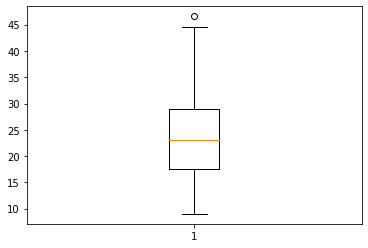

In [47]:
plt.figure()
plt.boxplot(auto_df['mpg'])

plt.show()

#### Histogram

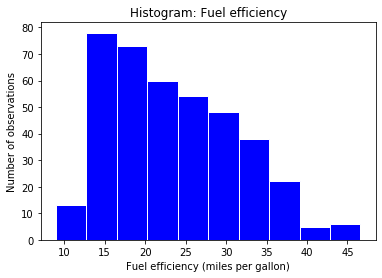

In [48]:
plt.figure()
plt.hist(auto_df.mpg, facecolor='blue', edgecolor='white')
plt.xlabel("Fuel efficiency (miles per gallon)")
plt.ylabel("Number of observations")
plt.title("Histogram: Fuel efficiency")
plt.show()

#### Scatter Plots

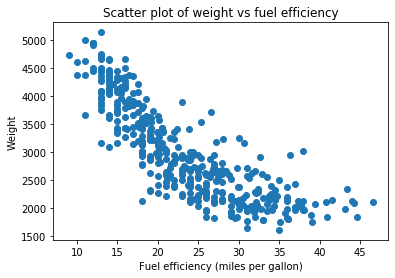

In [49]:
plt.figure()
plt.scatter(auto_df['mpg'], auto_df['weight'])
plt.xlabel("Fuel efficiency (miles per gallon)")
plt.ylabel("Weight")
plt.title("Scatter plot of weight vs fuel efficiency")
plt.show()

#### Scatter Matrix

In [50]:
from pandas.plotting import scatter_matrix

<Figure size 432x288 with 0 Axes>

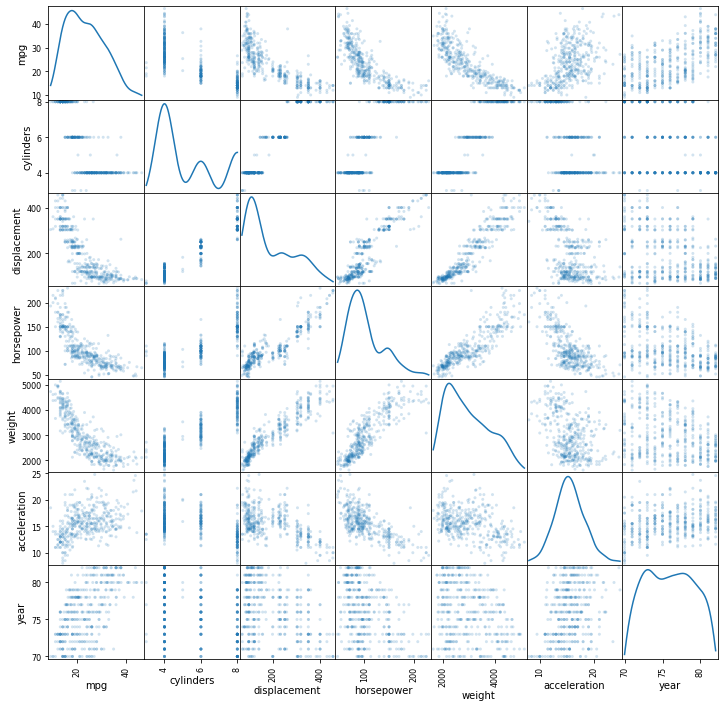

In [51]:
plt.figure()
scatter_matrix(auto_df, alpha=0.2, figsize=(12, 12), diagonal='kde')
plt.show()

#### <font color='blue'>EXCERCISE 3:</font> Log plots

<font color='blue'>a) Using Numpy, create the log transformation of the fuel efficiency variable mpg (ln_mpg) and the weight variable (ln_weight).</font>

In [52]:
#Enter code
auto_df['ln_mpg'] = np.log(auto_df['mpg'])
auto_df['ln_weight'] = np.log(auto_df['weight'])
auto_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,pre_sh,post_sh,ln_mpg,ln_weight
name,,,,,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,USA,yes,no,2.890372,8.161660
buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,USA,yes,no,2.708050,8.214194
plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,USA,yes,no,2.890372,8.142063
amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,USA,yes,no,2.772589,8.141190
ford torino,17.0,8,302.0,140.0,3449,10.5,70,USA,yes,no,2.833213,8.145840


<font color='blue'>b) Plot the histogram of log fuel efficiency and compare it to the histogram of fuel efficiency above.</font>

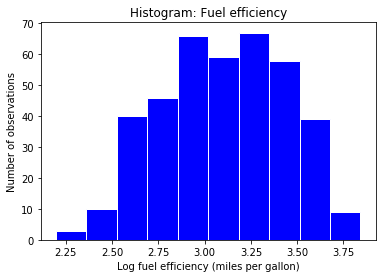

In [53]:
#Enter code
plt.figure()
plt.hist(auto_df.ln_mpg, facecolor='blue', edgecolor='white')
plt.xlabel("Log fuel efficiency (miles per gallon)")
plt.ylabel("Number of observations")
plt.title("Histogram: Fuel efficiency")
plt.show()

# Logs of fuel efficiency are closer to a normal distribution than the right-skewed plot of regular mpg.

<font color='blue'>c) Graph the scatter plot of log weight against log mpg. How does this scatter plot compared to the scatter plot we generated above? State and interpret the differences.</font>

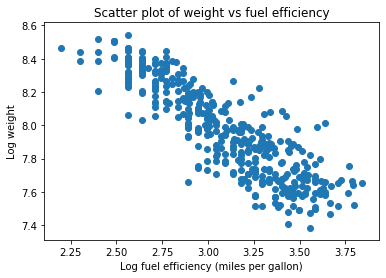

In [54]:
#Enter code
plt.figure()
plt.scatter(auto_df['ln_mpg'], auto_df['ln_weight'])
plt.xlabel("Log fuel efficiency (miles per gallon)")
plt.ylabel("Log weight")
plt.title("Scatter plot of weight vs fuel efficiency")
plt.show()

# This scatter plot looks more linear than the original plot meaning it has a more constant slope whereas the original plot has a changing slope.

#### <font color='blue'>EXCERCISE 4</font>: (extra credit)

Using the *matplotlib* library, come up with your own, creative way to plot the data. If you are new to the area of data visualization, feel free to look at: 

https://pubs.aeaweb.org/doi/pdfplus/10.1257/jep.28.1.209

To check out the possible commands within *matplotlib*, you may want to consult: https://matplotlib.org/gallery/index.html

Generate one graph using the car design and fuel efficiency data we discussed throughout this lab. Be sure to have all axes labeled and a title provided. Then, discuss the graph and tell me what you find particularly interesting about it.


In [55]:
euro_df = auto_df[auto_df['origin'] == 'Euro']
japan_df = auto_df[auto_df['origin'] == 'Japan']
usa_df = auto_df[auto_df['origin'] == 'USA']

usa_y = usa_df.groupby(['year'])['mpg'].mean()
japan_y = japan_df.groupby(['year'])['mpg'].mean()
euro_y = euro_df.groupby(['year'])['mpg'].mean()
# mpg_o_y = auto_df.groupby(['origin', 'year'])['mpg'].mean()

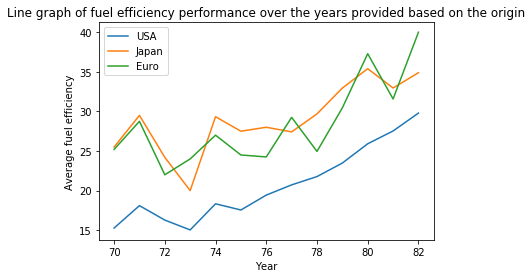

In [56]:
plt.figure()
plt.plot(usa_df['year'].unique(), usa_y, label='USA')
plt.plot(japan_df['year'].unique(), japan_y, label='Japan')
plt.plot(euro_df['year'].unique(), euro_y, label='Euro')
plt.xlabel('Year')
plt.ylabel('Average fuel efficiency')
plt.title('Line graph of fuel efficiency performance over the years provided based on the origin')
plt.legend()

# This graph compares how the different origins have improved their efficiency over the years. I thought this would be interesting
# because it shows how the different origins have progressed throughout time and if they progress differently. Europe and Japan
# have followed each other fairly closesly but I do find it interesting how Europe has multiple spikes throughout the years. I
# would have thought the graphs of each of the origins would be fairly linear like the US but that is not the case with Japan and 
# especially Europe. I would be interested to learn more about why this might have happened.